In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [4]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

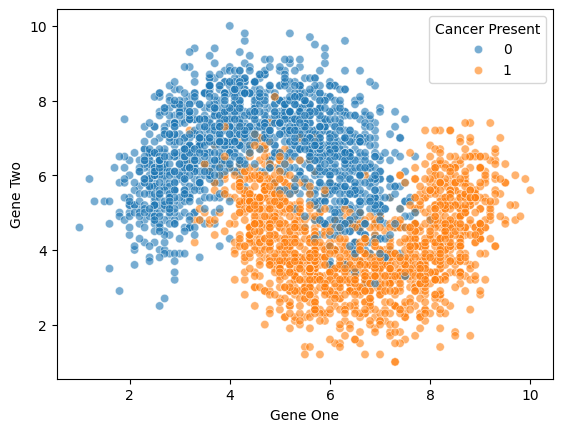

In [8]:
sns.scatterplot(df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6)

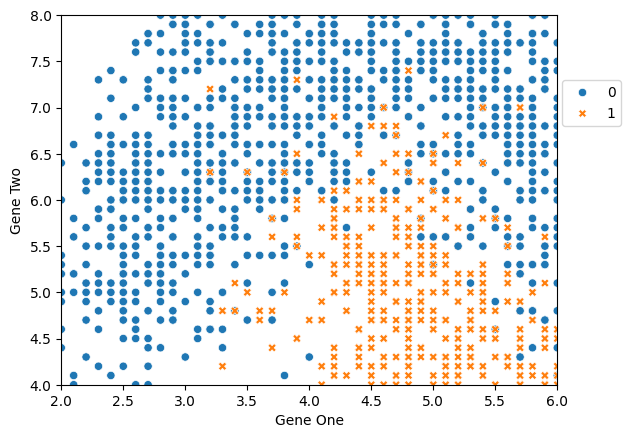

In [15]:
plt.xlim(2,6)
plt.ylim(4,8)
sns.scatterplot(df, x='Gene One', y='Gene Two', hue='Cancer Present', style='Cancer Present')
plt.legend(loc=(1.01, 0.7))

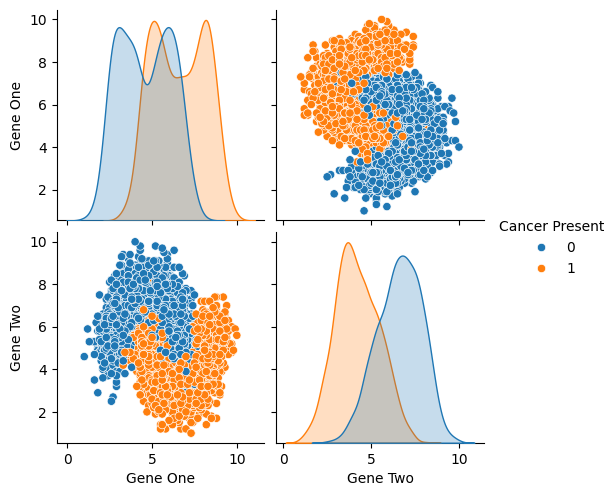

In [16]:
sns.pairplot(df, hue='Cancer Present')

In [58]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [25]:
model = KNeighborsClassifier(n_neighbors=1)

In [26]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [27]:
y_predict = model.predict(X_test)

In [29]:
confusion_matrix(y_test, y_predict)

array([[426,  44],
       [ 34, 396]], dtype=int64)

In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       470
           1       0.90      0.92      0.91       430

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



In [31]:
#Выбор оптимального K

In [ ]:
#С помощью метода локтя

In [39]:
test_error_rates = []
for k in range(1, 30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    test_error_rates.append(1 - accuracy_score(y_test, y_predict))

<Axes: >

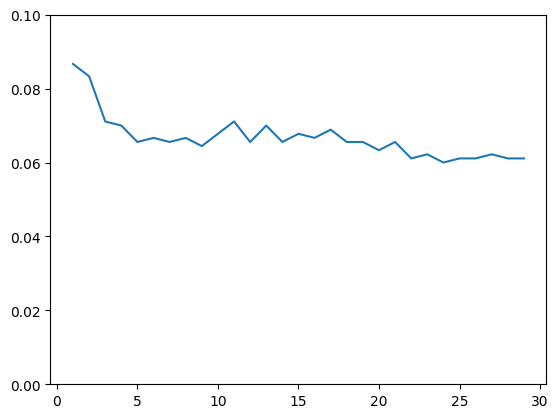

In [44]:
plt.ylim(0, 0.1)
sns.lineplot(x=range(1,30), y=test_error_rates)

In [45]:
#С помощью кросс-валидации

In [46]:
scaler = StandardScaler()

In [47]:
model = KNeighborsClassifier()

In [50]:
model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [61]:
operations = [('scaler', scaler), ('model', model)] #Pipeline для наших операций

In [62]:
pipe = Pipeline(operations) #Pipeline для наших операций

In [63]:
k_values = list(range(1,30))

In [64]:
param_grid = {'model__n_neighbors': k_values} #Название объекта(внутри operations)__название параметра

In [65]:
grid_cv = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [66]:
grid_cv.fit(X_train, y_train) #!!! Передаем немасштабированные признаки, т.к. масштабирование есть в operations

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                11, 12, 13, 14, 15, 16, 17, 18,
                                                19, 20, 21, 22, 23, 24, 25, 26,
                                                27, 28, 29]},
             scoring='accuracy')

In [67]:
grid_cv.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', KNeighborsClassifier(n_neighbors=20))],
 'verbose': False,
 'scaler': StandardScaler(),
 'model': KNeighborsClassifier(n_neighbors=20),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 20,
 'model__p': 2,
 'model__weights': 'uniform'}

In [68]:
y_predict = grid_cv.predict(X_test) #!!! Передаем немасштабированные данные, 
                                    #т.к. масштабирование есть в operations

In [69]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       470
           1       0.95      0.93      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



In [ ]:
#Новый пациент

In [70]:
new_patient = [[3.8, 6.4]]

In [72]:
grid_cv.predict_proba(new_patient)

C:\Users\SMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.9, 0.1]])